# Project 2 OpenClassroom
Analysis of education statistics provided by the World Bank https://datacatalog.worldbank.org/dataset/education-statistics

### Import of the required modules

In [1]:
## To display the graphs within the code and not in another windows 
import sys
print("Python Version :"+str(sys.version_info))
%matplotlib inline
#To be able to use CSV
import csv
print("CSV Version :"+csv.__version__)
# To be able to use Numpy
import numpy as np
print("Numpy Version :"+np.__version__)
# To be able to use Pandas
import pandas as pd
print("Pandas Version :"+pd.__version__)
# To be able to use Maplotlib
import matplotlib.pyplot as plt

# To be able to use Seaborn
import seaborn as sns
print("Seaborn Version :"+sns.__version__)

# To be able to use Warning
import warnings

#Disable the warnings "ignore"
warnings.filterwarnings("ignore")

Python Version :sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
CSV Version :1.0
Numpy Version :1.17.2
Pandas Version :0.25.1
Seaborn Version :0.9.0


### Read the Smart Data file 

In [2]:
NewSmartData=pd.read_csv('./Edstats_csv/NewSmartData.csv', sep=',', header=0)

In [3]:
NewSmartData

,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Average,Score,Score2005,Score2010
0,Argentina,ARG,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.CMPT.2024.ZS,NaN,5.436000e+01,NaN,NaN,NaN,NaN,4.537000e+01,NaN,NaN,NaN,NaN,4.986500e+01,5.0,7.0,4.0
1,Argentina,ARG,Barro-Lee: Percentage of population age 20-24 ...,BAR.TER.CMPT.2024.ZS,NaN,4.900000e-01,NaN,NaN,NaN,NaN,2.180000e+00,NaN,NaN,NaN,NaN,1.335000e+00,0.0,0.0,1.0
2,Argentina,ARG,Barro-Lee: Percentage of population age 25-29 ...,BAR.SEC.CMPT.2529.ZS,NaN,3.911000e+01,NaN,NaN,NaN,NaN,5.436000e+01,NaN,NaN,NaN,NaN,4.673500e+01,7.0,5.0,8.0
3,Argentina,ARG,Barro-Lee: Percentage of population age 25-29 ...,BAR.TER.CMPT.2529.ZS,NaN,1.270000e+00,NaN,NaN,NaN,NaN,2.100000e-01,NaN,NaN,NaN,NaN,7.400000e-01,0.0,0.0,0.0
4,Argentina,ARG,Barro-Lee: Percentage of population age 30-34 ...,BAR.SEC.CMPT.3034.ZS,NaN,3.344000e+01,NaN,NaN,NaN,NaN,3.911000e+01,NaN,NaN,NaN,NaN,3.627500e+01,5.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,4.192181e+04,4.430792e+04,4.643707e+04,4.806154e+04,4.840143e+04,4.700156e+04,4.837388e+04,4.979067e+04,5.145012e+04,5.278703e+04,5.459855e+04,4.846651e+04,8.0,9.0,8.0
914,United States,USA,Internet users (per 100 people),IT.NET.USER.P2,6.475826e+01,6.796805e+01,6.893119e+01,7.500000e+01,7.400000e+01,7.100000e+01,7.169000e+01,6.972946e+01,7.470000e+01,7.140000e+01,7.300000e+01,7.110700e+01,8.0,8.0,7.0
915,United States,USA,Population of the official age for secondary e...,SP.SEC.TOTL.IN,2.532477e+07,2.553687e+07,2.573517e+07,2.574166e+07,2.572834e+07,2.570217e+07,2.565205e+07,2.557596e+07,2.539730e+07,2.511786e+07,2.483458e+07,2.548607e+07,9.0,9.0,9.0
916,United States,USA,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,2.074605e+07,2.104180e+07,2.131241e+07,2.138822e+07,2.146666e+07,2.156518e+07,2.167902e+07,2.181852e+07,2.213582e+07,2.248952e+07,2.273174e+07,2.167045e+07,9.0,9.0,0.0


### Get the indicator codes that are distinct


The function unique is applied on the column name of the dataframe. The result is an array, so it is converted into a list

In [4]:
indicators=NewSmartData['Indicator Code'].unique().tolist()
print(indicators)

['BAR.SEC.CMPT.2024.ZS', 'BAR.TER.CMPT.2024.ZS', 'BAR.SEC.CMPT.2529.ZS', 'BAR.TER.CMPT.2529.ZS', 'BAR.SEC.CMPT.3034.ZS', 'BAR.TER.CMPT.3034.ZS', 'SE.XPD.TOTL.GB.ZS', 'NY.GDP.MKTP.CD', 'NY.GDP.PCAP.CD', 'IT.NET.USER.P2', 'SP.SEC.TOTL.IN', 'SP.TER.TOTL.IN', 'SP.POP.TOTL']


 ### Creation of a dictionnary that has for each indicator the associated weight

In [5]:
weights= [1, 1, 1, 1, 1, 1,1,1,1,1,1,1,1]
myzip=zip(indicators,weights)
weight_indicators=dict(myzip)
print(weight_indicators)

{'BAR.SEC.CMPT.2024.ZS': 1, 'BAR.TER.CMPT.2024.ZS': 1, 'BAR.SEC.CMPT.2529.ZS': 1, 'BAR.TER.CMPT.2529.ZS': 1, 'BAR.SEC.CMPT.3034.ZS': 1, 'BAR.TER.CMPT.3034.ZS': 1, 'SE.XPD.TOTL.GB.ZS': 1, 'NY.GDP.MKTP.CD': 1, 'NY.GDP.PCAP.CD': 1, 'IT.NET.USER.P2': 1, 'SP.SEC.TOTL.IN': 1, 'SP.TER.TOTL.IN': 1, 'SP.POP.TOTL': 1}


### A new score taking into consideration the weights is computed

The values of the Score column is multiplied by the associated value of the indicator 

In [6]:
NewSmartData['AveragedScore']=NewSmartData['Indicator Code'].map(weight_indicators)*NewSmartData['Score']

In [7]:
NewSmartData

,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Average,Score,Score2005,Score2010,AveragedScore
0,Argentina,ARG,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.CMPT.2024.ZS,NaN,5.436000e+01,NaN,NaN,NaN,NaN,4.537000e+01,NaN,NaN,NaN,NaN,4.986500e+01,5.0,7.0,4.0,5.0
1,Argentina,ARG,Barro-Lee: Percentage of population age 20-24 ...,BAR.TER.CMPT.2024.ZS,NaN,4.900000e-01,NaN,NaN,NaN,NaN,2.180000e+00,NaN,NaN,NaN,NaN,1.335000e+00,0.0,0.0,1.0,0.0
2,Argentina,ARG,Barro-Lee: Percentage of population age 25-29 ...,BAR.SEC.CMPT.2529.ZS,NaN,3.911000e+01,NaN,NaN,NaN,NaN,5.436000e+01,NaN,NaN,NaN,NaN,4.673500e+01,7.0,5.0,8.0,7.0
3,Argentina,ARG,Barro-Lee: Percentage of population age 25-29 ...,BAR.TER.CMPT.2529.ZS,NaN,1.270000e+00,NaN,NaN,NaN,NaN,2.100000e-01,NaN,NaN,NaN,NaN,7.400000e-01,0.0,0.0,0.0,0.0
4,Argentina,ARG,Barro-Lee: Percentage of population age 30-34 ...,BAR.SEC.CMPT.3034.ZS,NaN,3.344000e+01,NaN,NaN,NaN,NaN,3.911000e+01,NaN,NaN,NaN,NaN,3.627500e+01,5.0,5.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,4.192181e+04,4.430792e+04,4.643707e+04,4.806154e+04,4.840143e+04,4.700156e+04,4.837388e+04,4.979067e+04,5.145012e+04,5.278703e+04,5.459855e+04,4.846651e+04,8.0,9.0,8.0,8.0
914,United States,USA,Internet users (per 100 people),IT.NET.USER.P2,6.475826e+01,6.796805e+01,6.893119e+01,7.500000e+01,7.400000e+01,7.100000e+01,7.169000e+01,6.972946e+01,7.470000e+01,7.140000e+01,7.300000e+01,7.110700e+01,8.0,8.0,7.0,8.0
915,United States,USA,Population of the official age for secondary e...,SP.SEC.TOTL.IN,2.532477e+07,2.553687e+07,2.573517e+07,2.574166e+07,2.572834e+07,2.570217e+07,2.565205e+07,2.557596e+07,2.539730e+07,2.511786e+07,2.483458e+07,2.548607e+07,9.0,9.0,9.0,9.0
916,United States,USA,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,2.074605e+07,2.104180e+07,2.131241e+07,2.138822e+07,2.146666e+07,2.156518e+07,2.167902e+07,2.181852e+07,2.213582e+07,2.248952e+07,2.273174e+07,2.167045e+07,9.0,9.0,0.0,9.0


### Display a Graph with the averaged Score by country

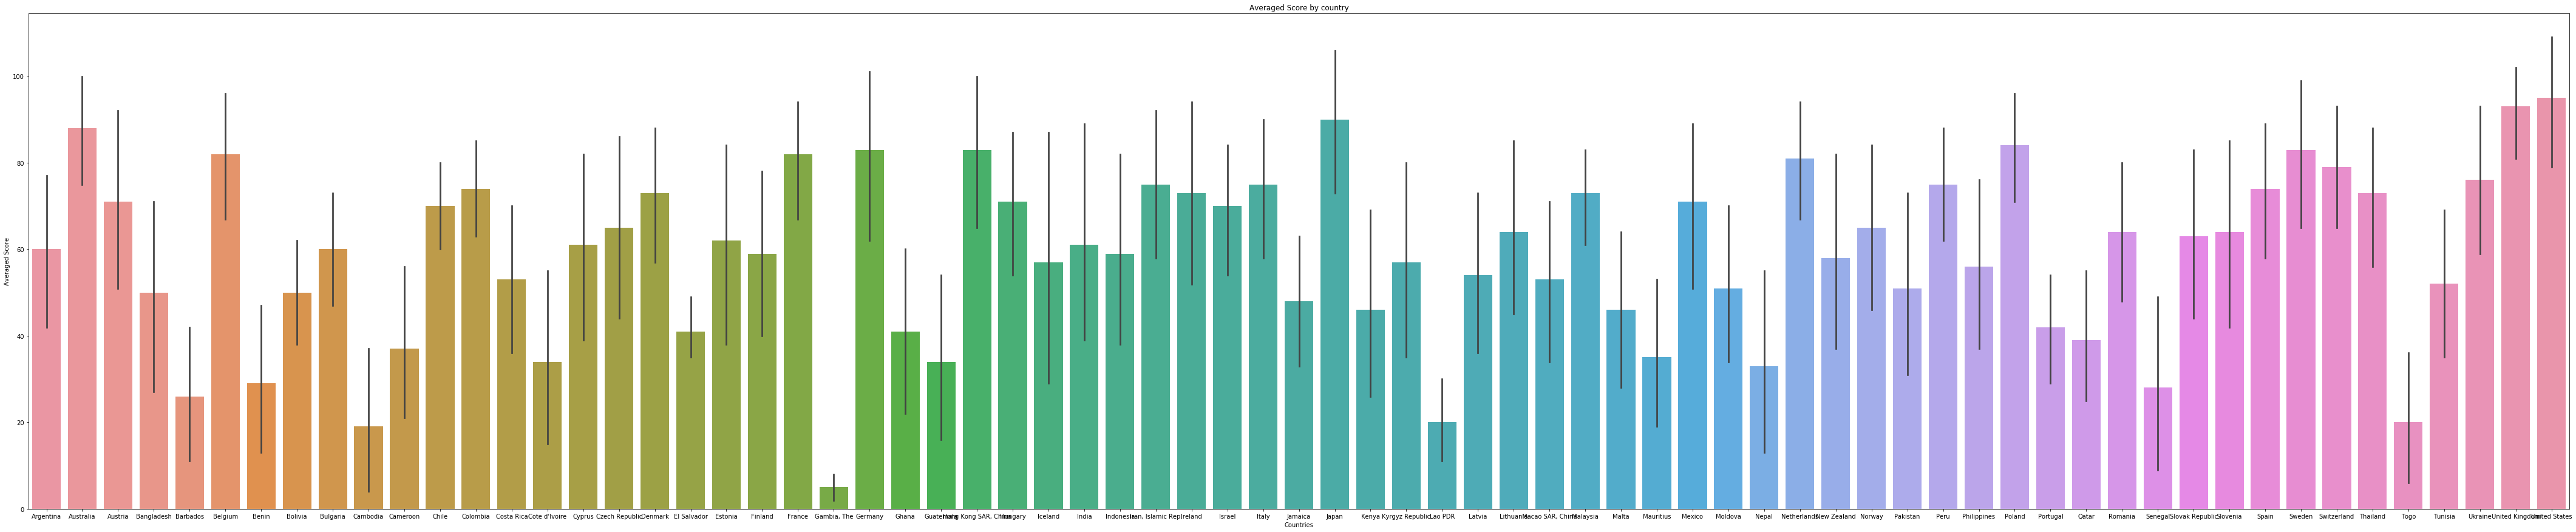

In [8]:
#sns.set(color_codes=True)    

plt.figure(figsize=(75,15))

ax=sns.barplot(x='Country Name',y='AveragedScore', data=NewSmartData, estimator=sum)
#ax=sns.barplot(x='Country Name',y='AveragedScore', data=RankedData)
ax.set_title('Averaged Score by country')
ax.set_xlabel('Countries')
ax.set_ylabel('Averaged Score')
ax.figure.savefig("./Edstats_csv/averagedscorebycountry.png")

The number of country is too important so we decide to keep only whom score is higher than 50 

The  averaged score are summed by country and sorted by descending values. The result is stored in a new dataset with a new index.

In [9]:
ranking_df=NewSmartData[['Country Name','AveragedScore']].groupby('Country Name').sum().sort_values(by=['AveragedScore'], ascending=False).reset_index()
ranking_df['Country Name']

0      United States
1     United Kingdom
2              Japan
3          Australia
4             Poland
           ...      
66          Barbados
67           Lao PDR
68              Togo
69          Cambodia
70       Gambia, The
Name: Country Name, Length: 71, dtype: object

### Compute the average score by country and select the ones that have a score higher than 50

In [10]:
ranking_df=NewSmartData[['Country Name','AveragedScore']].groupby('Country Name').sum().sort_values(by=['AveragedScore'], ascending=False) > 50

The index of the dataframe is resetted.

In [11]:
ranking_df=ranking_df.reset_index()
ranking_df

,Country Name,AveragedScore
0,United States,True
1,United Kingdom,True
2,Japan,True
3,Australia,True
4,Poland,True
...,...,...
66,Barbados,False
67,Lao PDR,False
68,Togo,False
69,Cambodia,False


The countries that have the value True in the AveragedScore column are stored in a list

In [12]:
restricted_list_of_countries=ranking_df['Country Name'].loc[ranking_df['AveragedScore']==True]

In [13]:
list_of_selected_countries=restricted_list_of_countries.to_list()

The list of the countries are displayed

In [14]:
list_of_selected_countries

['United States',
 'United Kingdom',
 'Japan',
 'Australia',
 'Poland',
 'Hong Kong SAR, China',
 'Sweden',
 'Germany',
 'Belgium',
 'France',
 'Netherlands',
 'Switzerland',
 'Ukraine',
 'Peru',
 'Italy',
 'Iran, Islamic Rep.',
 'Colombia',
 'Spain',
 'Denmark',
 'Ireland',
 'Malaysia',
 'Thailand',
 'Austria',
 'Mexico',
 'Hungary',
 'Chile',
 'Israel',
 'Norway',
 'Czech Republic',
 'Romania',
 'Slovenia',
 'Lithuania',
 'Slovak Republic',
 'Estonia',
 'India',
 'Cyprus',
 'Argentina',
 'Bulgaria',
 'Indonesia',
 'Finland',
 'New Zealand',
 'Iceland',
 'Kyrgyz Republic',
 'Philippines',
 'Latvia',
 'Macao SAR, China',
 'Costa Rica',
 'Tunisia',
 'Pakistan',
 'Moldova']

The dataset is parsed and only the data related to the selected countries are kept

In [15]:
NewSmartData=NewSmartData.loc[NewSmartData['Country Name'].isin(list_of_selected_countries)]

In [16]:
NewSmartData

,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Average,Score,Score2005,Score2010,AveragedScore
0,Argentina,ARG,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.CMPT.2024.ZS,NaN,5.436000e+01,NaN,NaN,NaN,NaN,4.537000e+01,NaN,NaN,NaN,NaN,4.986500e+01,5.0,7.0,4.0,5.0
1,Argentina,ARG,Barro-Lee: Percentage of population age 20-24 ...,BAR.TER.CMPT.2024.ZS,NaN,4.900000e-01,NaN,NaN,NaN,NaN,2.180000e+00,NaN,NaN,NaN,NaN,1.335000e+00,0.0,0.0,1.0,0.0
2,Argentina,ARG,Barro-Lee: Percentage of population age 25-29 ...,BAR.SEC.CMPT.2529.ZS,NaN,3.911000e+01,NaN,NaN,NaN,NaN,5.436000e+01,NaN,NaN,NaN,NaN,4.673500e+01,7.0,5.0,8.0,7.0
3,Argentina,ARG,Barro-Lee: Percentage of population age 25-29 ...,BAR.TER.CMPT.2529.ZS,NaN,1.270000e+00,NaN,NaN,NaN,NaN,2.100000e-01,NaN,NaN,NaN,NaN,7.400000e-01,0.0,0.0,0.0,0.0
4,Argentina,ARG,Barro-Lee: Percentage of population age 30-34 ...,BAR.SEC.CMPT.3034.ZS,NaN,3.344000e+01,NaN,NaN,NaN,NaN,3.911000e+01,NaN,NaN,NaN,NaN,3.627500e+01,5.0,5.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,4.192181e+04,4.430792e+04,4.643707e+04,4.806154e+04,4.840143e+04,4.700156e+04,4.837388e+04,4.979067e+04,5.145012e+04,5.278703e+04,5.459855e+04,4.846651e+04,8.0,9.0,8.0,8.0
914,United States,USA,Internet users (per 100 people),IT.NET.USER.P2,6.475826e+01,6.796805e+01,6.893119e+01,7.500000e+01,7.400000e+01,7.100000e+01,7.169000e+01,6.972946e+01,7.470000e+01,7.140000e+01,7.300000e+01,7.110700e+01,8.0,8.0,7.0,8.0
915,United States,USA,Population of the official age for secondary e...,SP.SEC.TOTL.IN,2.532477e+07,2.553687e+07,2.573517e+07,2.574166e+07,2.572834e+07,2.570217e+07,2.565205e+07,2.557596e+07,2.539730e+07,2.511786e+07,2.483458e+07,2.548607e+07,9.0,9.0,9.0,9.0
916,United States,USA,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,2.074605e+07,2.104180e+07,2.131241e+07,2.138822e+07,2.146666e+07,2.156518e+07,2.167902e+07,2.181852e+07,2.213582e+07,2.248952e+07,2.273174e+07,2.167045e+07,9.0,9.0,0.0,9.0


### Display a barplot with the averaged Score by country with the indicators

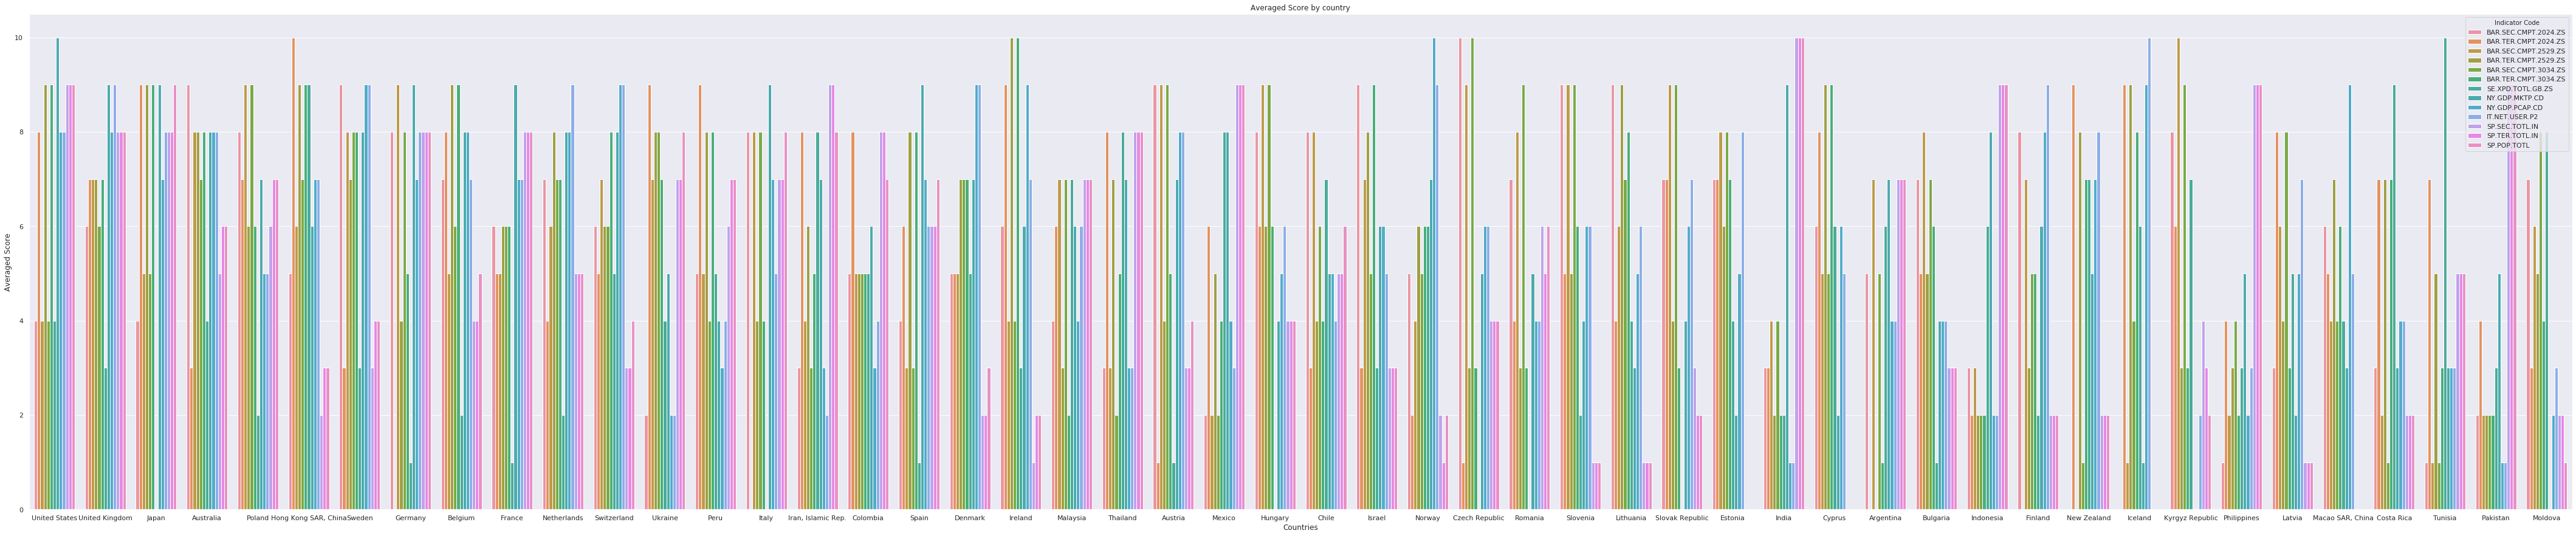

In [17]:
sns.set(color_codes=True) 

plt.figure(figsize=(75,15))

ax=sns.barplot(x='Country Name',y='AveragedScore',order=list_of_selected_countries, hue="Indicator Code",data=NewSmartData, estimator=sum)
ax.set_title('Averaged Score by country')
ax.set_xlabel('Countries')
ax.set_ylabel('Averaged Score')
ax.figure.savefig("./Edstats_csv/averagedscorebyrestrictedcountrywithindicators.png")

### Display a catplot with the averaged Score by country

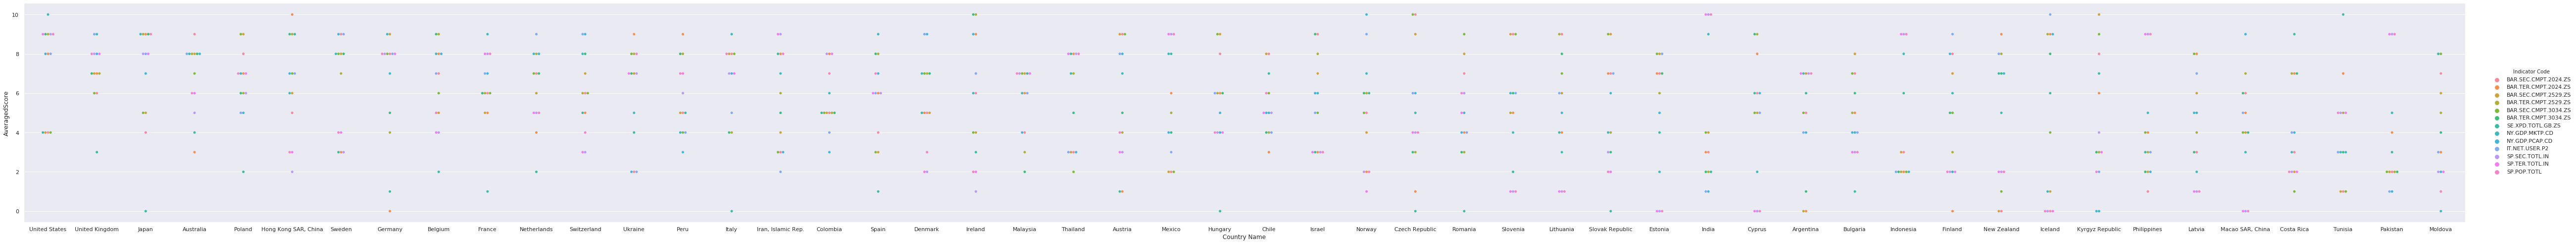

In [18]:
sns.set(color_codes=True)    
#sns.palplot(sns.color_palette())

#plt.figure(figsize=(100,200))

ax=sns.catplot(x='Country Name',y='AveragedScore', hue="Indicator Code",order=list_of_selected_countries,data=NewSmartData,kind="swarm", estimator=sum, height=7, aspect=10)
plt.savefig('./Edstats_csv/averagedscorebyrestrictedcountrywithindicatorsswarm.png') 
#ax.figure.savefig("./Edstats_csv/averagedscorebyrestrictedcountrywithindicators2.png")

The GDP, the population are the indicators that have a strong impact on the first countries. Moreover, we notice that the total population, the percentage of the secondary and tertiary have for a specific country have  the same score (so there are correlated). For the reasons, we decide to set a weight of 1 for the population indicators and the GDP. For the other indicators, the weight is set to 2.

 ### Creation of a dictionnary that has for each indicator the associated weight

In [19]:
second_weights= [2, 2, 2, 2, 2, 2,2,1,2,2,1,1,1]
myzip=zip(indicators,second_weights)
second_weight_indicators=dict(myzip)
print(second_weight_indicators)


{'BAR.SEC.CMPT.2024.ZS': 2, 'BAR.TER.CMPT.2024.ZS': 2, 'BAR.SEC.CMPT.2529.ZS': 2, 'BAR.TER.CMPT.2529.ZS': 2, 'BAR.SEC.CMPT.3034.ZS': 2, 'BAR.TER.CMPT.3034.ZS': 2, 'SE.XPD.TOTL.GB.ZS': 2, 'NY.GDP.MKTP.CD': 1, 'NY.GDP.PCAP.CD': 2, 'IT.NET.USER.P2': 2, 'SP.SEC.TOTL.IN': 1, 'SP.TER.TOTL.IN': 1, 'SP.POP.TOTL': 1}


In [20]:
NewSmartData

,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Average,Score,Score2005,Score2010,AveragedScore
0,Argentina,ARG,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.CMPT.2024.ZS,NaN,5.436000e+01,NaN,NaN,NaN,NaN,4.537000e+01,NaN,NaN,NaN,NaN,4.986500e+01,5.0,7.0,4.0,5.0
1,Argentina,ARG,Barro-Lee: Percentage of population age 20-24 ...,BAR.TER.CMPT.2024.ZS,NaN,4.900000e-01,NaN,NaN,NaN,NaN,2.180000e+00,NaN,NaN,NaN,NaN,1.335000e+00,0.0,0.0,1.0,0.0
2,Argentina,ARG,Barro-Lee: Percentage of population age 25-29 ...,BAR.SEC.CMPT.2529.ZS,NaN,3.911000e+01,NaN,NaN,NaN,NaN,5.436000e+01,NaN,NaN,NaN,NaN,4.673500e+01,7.0,5.0,8.0,7.0
3,Argentina,ARG,Barro-Lee: Percentage of population age 25-29 ...,BAR.TER.CMPT.2529.ZS,NaN,1.270000e+00,NaN,NaN,NaN,NaN,2.100000e-01,NaN,NaN,NaN,NaN,7.400000e-01,0.0,0.0,0.0,0.0
4,Argentina,ARG,Barro-Lee: Percentage of population age 30-34 ...,BAR.SEC.CMPT.3034.ZS,NaN,3.344000e+01,NaN,NaN,NaN,NaN,3.911000e+01,NaN,NaN,NaN,NaN,3.627500e+01,5.0,5.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,4.192181e+04,4.430792e+04,4.643707e+04,4.806154e+04,4.840143e+04,4.700156e+04,4.837388e+04,4.979067e+04,5.145012e+04,5.278703e+04,5.459855e+04,4.846651e+04,8.0,9.0,8.0,8.0
914,United States,USA,Internet users (per 100 people),IT.NET.USER.P2,6.475826e+01,6.796805e+01,6.893119e+01,7.500000e+01,7.400000e+01,7.100000e+01,7.169000e+01,6.972946e+01,7.470000e+01,7.140000e+01,7.300000e+01,7.110700e+01,8.0,8.0,7.0,8.0
915,United States,USA,Population of the official age for secondary e...,SP.SEC.TOTL.IN,2.532477e+07,2.553687e+07,2.573517e+07,2.574166e+07,2.572834e+07,2.570217e+07,2.565205e+07,2.557596e+07,2.539730e+07,2.511786e+07,2.483458e+07,2.548607e+07,9.0,9.0,9.0,9.0
916,United States,USA,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,2.074605e+07,2.104180e+07,2.131241e+07,2.138822e+07,2.146666e+07,2.156518e+07,2.167902e+07,2.181852e+07,2.213582e+07,2.248952e+07,2.273174e+07,2.167045e+07,9.0,9.0,0.0,9.0


A new column of the dataset is affected to the new averaged score

In [21]:
NewSmartData['AveragedScore2']=NewSmartData['Indicator Code'].map(second_weight_indicators)*NewSmartData['Score']

In [22]:
NewSmartData

,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,Average,Score,Score2005,Score2010,AveragedScore,AveragedScore2
0,Argentina,ARG,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.CMPT.2024.ZS,NaN,5.436000e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.986500e+01,5.0,7.0,4.0,5.0,10.0
1,Argentina,ARG,Barro-Lee: Percentage of population age 20-24 ...,BAR.TER.CMPT.2024.ZS,NaN,4.900000e-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.335000e+00,0.0,0.0,1.0,0.0,0.0
2,Argentina,ARG,Barro-Lee: Percentage of population age 25-29 ...,BAR.SEC.CMPT.2529.ZS,NaN,3.911000e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.673500e+01,7.0,5.0,8.0,7.0,14.0
3,Argentina,ARG,Barro-Lee: Percentage of population age 25-29 ...,BAR.TER.CMPT.2529.ZS,NaN,1.270000e+00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.400000e-01,0.0,0.0,0.0,0.0,0.0
4,Argentina,ARG,Barro-Lee: Percentage of population age 30-34 ...,BAR.SEC.CMPT.3034.ZS,NaN,3.344000e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.627500e+01,5.0,5.0,6.0,5.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,4.192181e+04,4.430792e+04,4.643707e+04,4.806154e+04,4.840143e+04,4.700156e+04,...,4.979067e+04,5.145012e+04,5.278703e+04,5.459855e+04,4.846651e+04,8.0,9.0,8.0,8.0,16.0
914,United States,USA,Internet users (per 100 people),IT.NET.USER.P2,6.475826e+01,6.796805e+01,6.893119e+01,7.500000e+01,7.400000e+01,7.100000e+01,...,6.972946e+01,7.470000e+01,7.140000e+01,7.300000e+01,7.110700e+01,8.0,8.0,7.0,8.0,16.0
915,United States,USA,Population of the official age for secondary e...,SP.SEC.TOTL.IN,2.532477e+07,2.553687e+07,2.573517e+07,2.574166e+07,2.572834e+07,2.570217e+07,...,2.557596e+07,2.539730e+07,2.511786e+07,2.483458e+07,2.548607e+07,9.0,9.0,9.0,9.0,9.0
916,United States,USA,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,2.074605e+07,2.104180e+07,2.131241e+07,2.138822e+07,2.146666e+07,2.156518e+07,...,2.181852e+07,2.213582e+07,2.248952e+07,2.273174e+07,2.167045e+07,9.0,9.0,0.0,9.0,9.0


### Compute the average score by country and select the ones that have a score higher than 110

In [23]:
ranking_df=NewSmartData[['Country Name','AveragedScore2']].groupby('Country Name').sum().sort_values(by=['AveragedScore2'], ascending=False)>110 

In [24]:
ranking_df=ranking_df.reset_index()
ranking_df

,Country Name,AveragedScore2
0,United States,True
1,United Kingdom,True
2,"Hong Kong SAR, China",True
3,Australia,True
4,Sweden,True
5,Japan,True
6,Belgium,True
7,Poland,True
8,Switzerland,True
9,Netherlands,True


The countries that have the value True in the AveragedScore2 column are stored in a list

In [25]:
restricted_list_of_countries=ranking_df['Country Name'].loc[ranking_df['AveragedScore2']==True]

In [26]:
list_of_selected_countries=restricted_list_of_countries.to_list()

The dataset is parsed and only the data related to the selected countries are kept

In [27]:
NewSmartData=NewSmartData.loc[NewSmartData['Country Name'].isin(list_of_selected_countries)]

### Display a barplot with the averaged Score by country (the 2nd time)

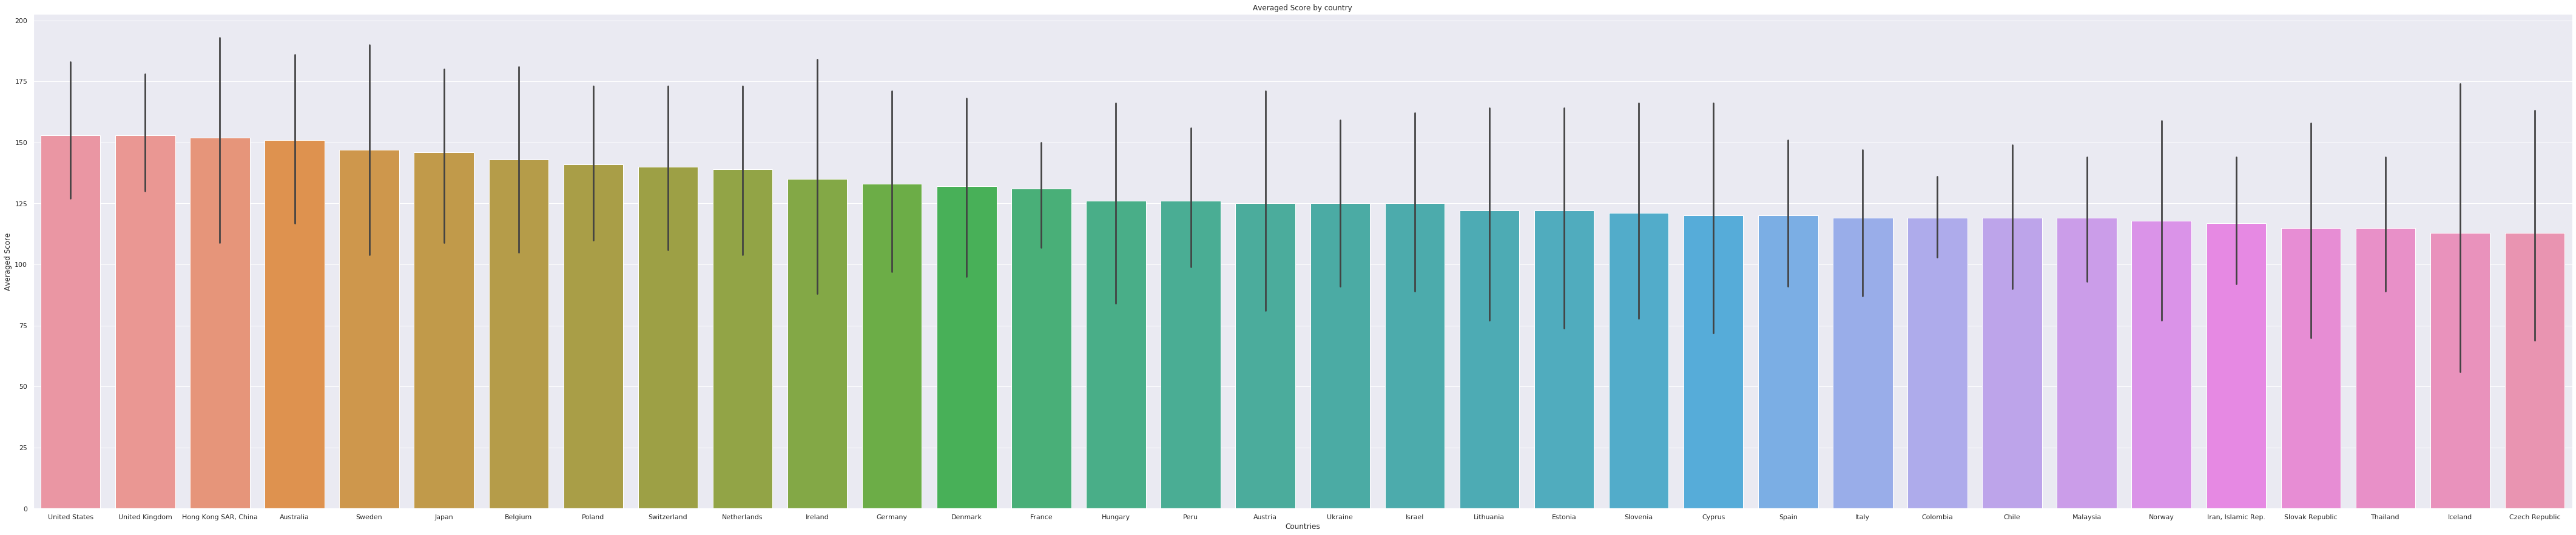

In [28]:
#sns.set(color_codes=True)    

plt.figure(figsize=(75,15))

ax=sns.barplot(x='Country Name',y='AveragedScore2', order=list_of_selected_countries, data=NewSmartData, estimator=sum)
#ax=sns.barplot(x='Country Name',y='AveragedScore', data=RankedData)
ax.set_title('Averaged Score by country')
ax.set_xlabel('Countries')
ax.set_ylabel('Averaged Score')
ax.figure.savefig("./Edstats_csv/averagedscorebycountry2.png")

### Display a barplot with the averaged Score by country with the indicators (the 2nd time)

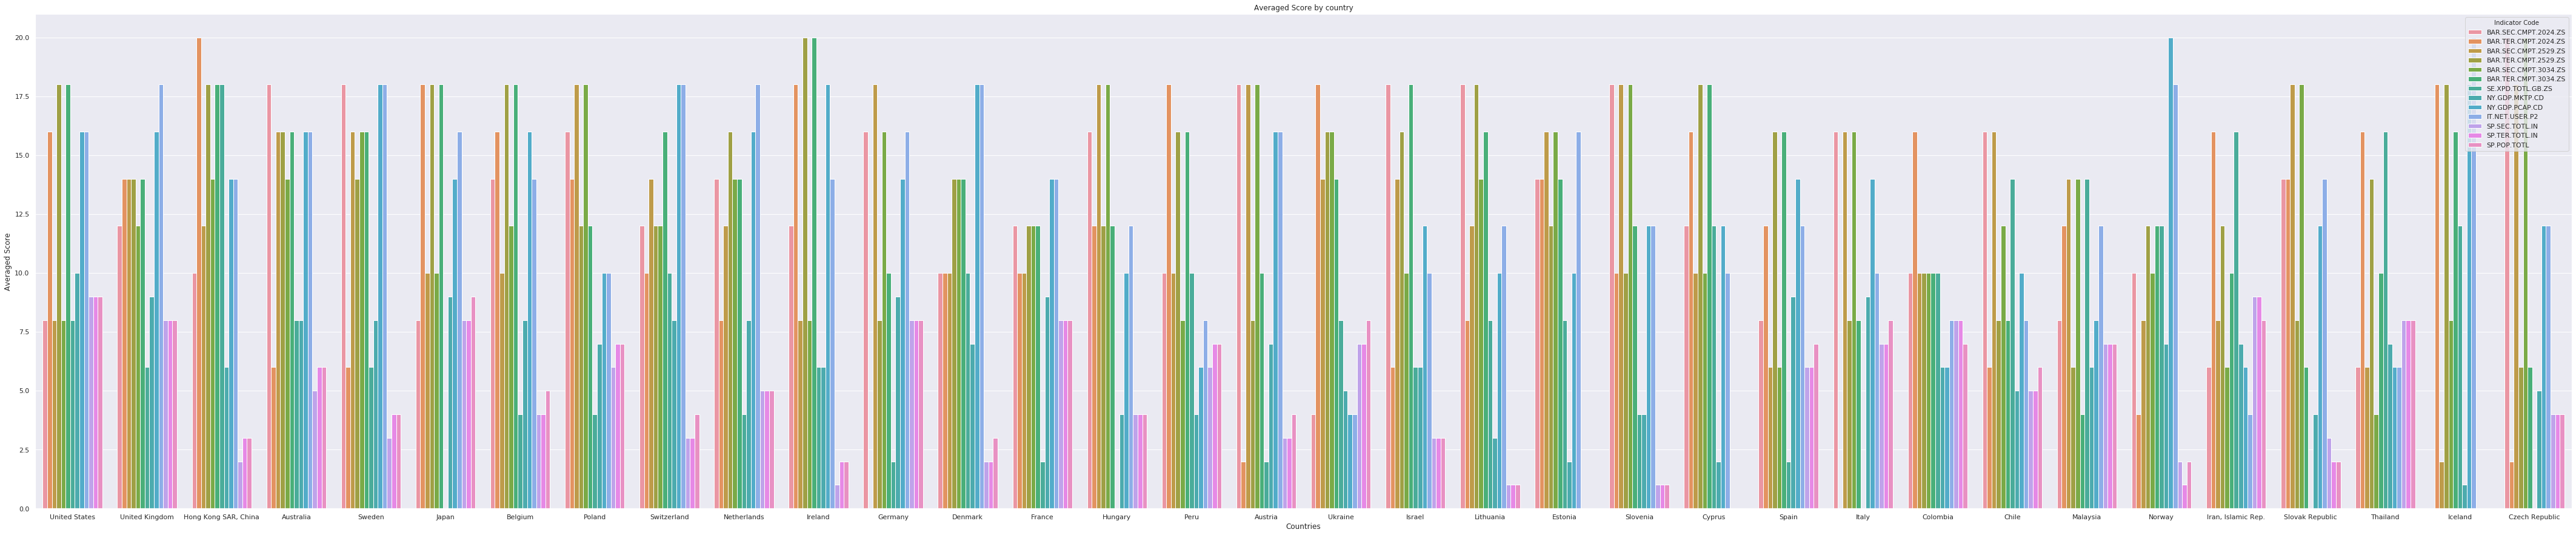

In [29]:
sns.set(color_codes=True) 

plt.figure(figsize=(75,15))

ax=sns.barplot(x='Country Name',y='AveragedScore2',order=list_of_selected_countries, hue="Indicator Code",data=NewSmartData, estimator=sum)
ax.set_title('Averaged Score by country')
ax.set_xlabel('Countries')
ax.set_ylabel('Averaged Score')
ax.figure.savefig("./Edstats_csv/averagedscorebyrestrictedcountrywithindicators2.png")

### Display a catplot with the averaged Score by country with the indicators (the 2nd time)

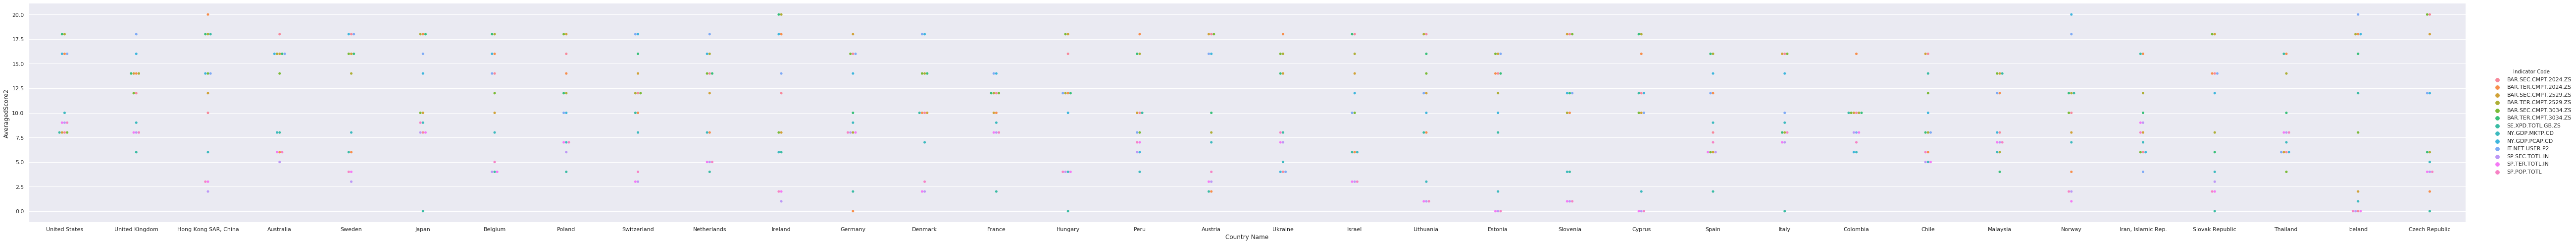

In [30]:
sns.set(color_codes=True)    
#sns.palplot(sns.color_palette())

#plt.figure(figsize=(100,200))

ax=sns.catplot(x='Country Name',y='AveragedScore2', hue="Indicator Code",order=list_of_selected_countries,data=NewSmartData,kind="swarm", estimator=sum, height=7, aspect=10)
plt.savefig('./Edstats_csv/averagedscorebyrestrictedcountrywithindicatorsswarm2.png') 

There are better opportunities for countries where the GDP / capita , the internet access and the percentage of expendidures in education are higher. So we set for these indicator, the weight 4 

 ### Creation of a dictionnary that has for each indicator the associated weight

In [31]:
third_weights= [2, 2, 2, 2, 2, 2,4,1,4,4,1,1,1]
myzip=zip(indicators,third_weights)
third_weight_indicators=dict(myzip)
print(third_weight_indicators)


{'BAR.SEC.CMPT.2024.ZS': 2, 'BAR.TER.CMPT.2024.ZS': 2, 'BAR.SEC.CMPT.2529.ZS': 2, 'BAR.TER.CMPT.2529.ZS': 2, 'BAR.SEC.CMPT.3034.ZS': 2, 'BAR.TER.CMPT.3034.ZS': 2, 'SE.XPD.TOTL.GB.ZS': 4, 'NY.GDP.MKTP.CD': 1, 'NY.GDP.PCAP.CD': 4, 'IT.NET.USER.P2': 4, 'SP.SEC.TOTL.IN': 1, 'SP.TER.TOTL.IN': 1, 'SP.POP.TOTL': 1}


A new column of the dataset is affected to the new averaged score

In [32]:
NewSmartData['AveragedScore3']=NewSmartData['Indicator Code'].map(third_weight_indicators)*NewSmartData['Score']

In [33]:
NewSmartData

,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,Average,Score,Score2005,Score2010,AveragedScore,AveragedScore2,AveragedScore3
13,Australia,AUS,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.CMPT.2024.ZS,NaN,7.154000e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.408500e+01,9.0,9.0,9.0,9.0,18.0,18.0
14,Australia,AUS,Barro-Lee: Percentage of population age 20-24 ...,BAR.TER.CMPT.2024.ZS,NaN,8.640000e+00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.320000e+00,3.0,5.0,0.0,3.0,6.0,6.0
15,Australia,AUS,Barro-Lee: Percentage of population age 25-29 ...,BAR.SEC.CMPT.2529.ZS,NaN,5.521000e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.783500e+01,8.0,8.0,6.0,8.0,16.0,16.0
16,Australia,AUS,Barro-Lee: Percentage of population age 25-29 ...,BAR.TER.CMPT.2529.ZS,NaN,2.458000e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.635000e+01,8.0,8.0,8.0,8.0,16.0,16.0
17,Australia,AUS,Barro-Lee: Percentage of population age 30-34 ...,BAR.SEC.CMPT.3034.ZS,NaN,5.414000e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.643000e+01,7.0,8.0,5.0,7.0,14.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,4.192181e+04,4.430792e+04,4.643707e+04,4.806154e+04,4.840143e+04,4.700156e+04,...,5.145012e+04,5.278703e+04,5.459855e+04,4.846651e+04,8.0,9.0,8.0,8.0,16.0,32.0
914,United States,USA,Internet users (per 100 people),IT.NET.USER.P2,6.475826e+01,6.796805e+01,6.893119e+01,7.500000e+01,7.400000e+01,7.100000e+01,...,7.470000e+01,7.140000e+01,7.300000e+01,7.110700e+01,8.0,8.0,7.0,8.0,16.0,32.0
915,United States,USA,Population of the official age for secondary e...,SP.SEC.TOTL.IN,2.532477e+07,2.553687e+07,2.573517e+07,2.574166e+07,2.572834e+07,2.570217e+07,...,2.539730e+07,2.511786e+07,2.483458e+07,2.548607e+07,9.0,9.0,9.0,9.0,9.0,9.0
916,United States,USA,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,2.074605e+07,2.104180e+07,2.131241e+07,2.138822e+07,2.146666e+07,2.156518e+07,...,2.213582e+07,2.248952e+07,2.273174e+07,2.167045e+07,9.0,9.0,0.0,9.0,9.0,9.0


### Compute the average score by country and select the ones that have a score higher than 150

In [34]:
ranking_df=NewSmartData[['Country Name','AveragedScore3']].groupby('Country Name').sum().sort_values(by=['AveragedScore3'], ascending=False)>150

In [35]:
ranking_df=ranking_df.reset_index()
ranking_df

,Country Name,AveragedScore3
0,"Hong Kong SAR, China",True
1,United States,True
2,United Kingdom,True
3,Australia,True
4,Sweden,True
5,Switzerland,True
6,Denmark,True
7,Belgium,True
8,Netherlands,True
9,Japan,True


The countries that have the value True in the AveragedScore column are stored in a list

In [36]:
restricted_list_of_countries=ranking_df['Country Name'].loc[ranking_df['AveragedScore3']==True]

In [37]:
list_of_selected_countries=restricted_list_of_countries.to_list()

The dataset is parsed and only the data related to the selected countries are kept

In [38]:
NewSmartData=NewSmartData.loc[NewSmartData['Country Name'].isin(list_of_selected_countries)]

### Display a barplot with the averaged Score by country (the 3rd time)

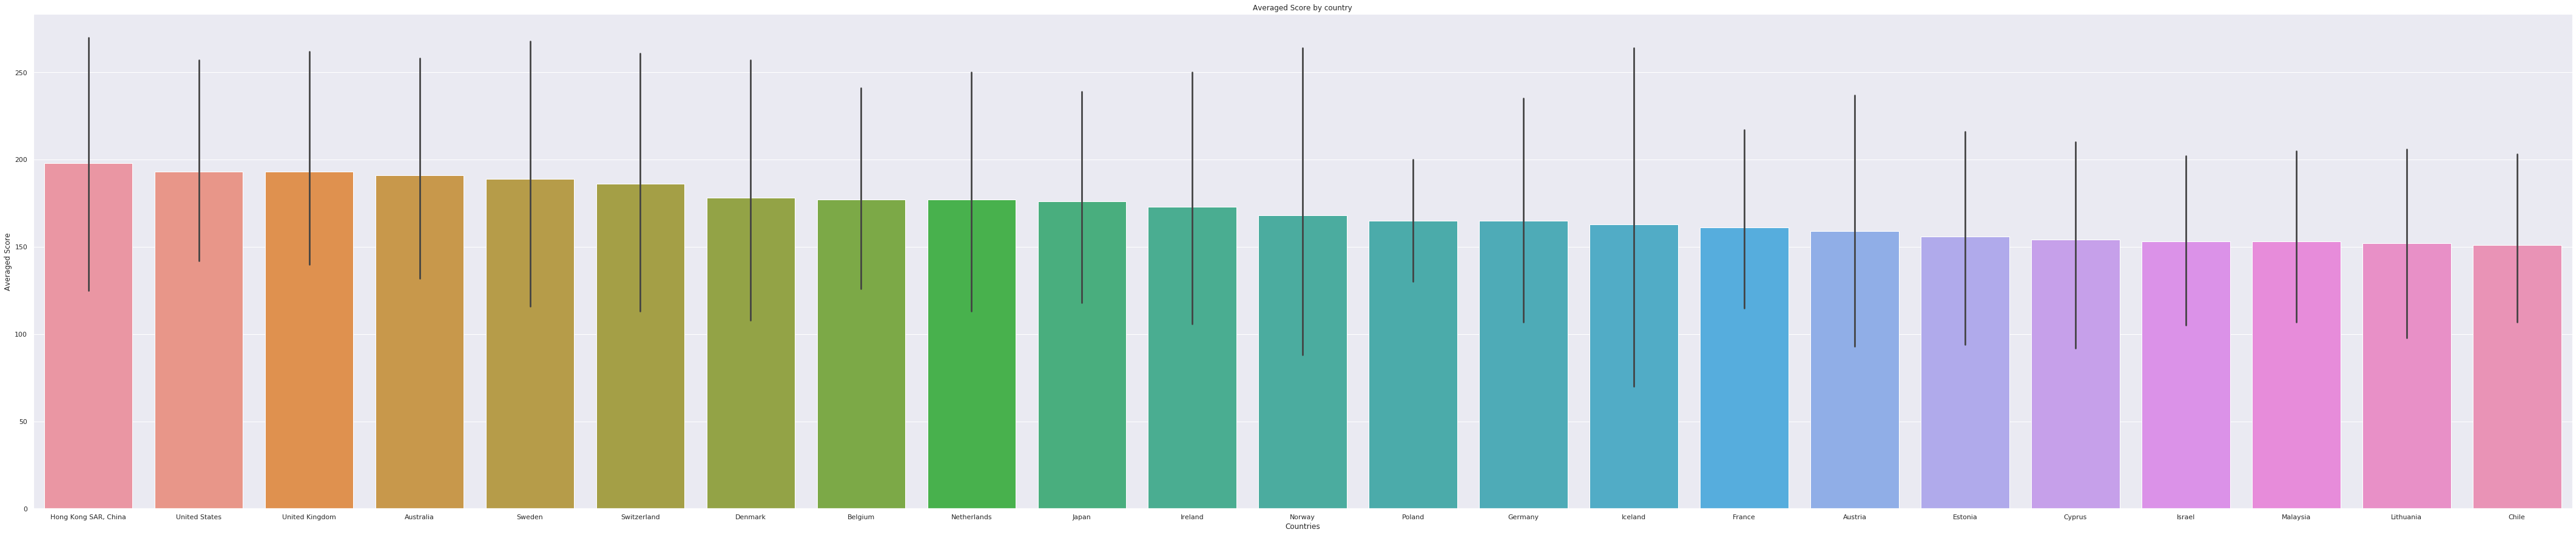

In [39]:
#sns.set(color_codes=True)    

plt.figure(figsize=(75,15))

ax=sns.barplot(x='Country Name',y='AveragedScore3', order=list_of_selected_countries, data=NewSmartData, estimator=sum)
#ax=sns.barplot(x='Country Name',y='AveragedScore', data=RankedData)
ax.set_title('Averaged Score by country')
ax.set_xlabel('Countries')
ax.set_ylabel('Averaged Score')
ax.figure.savefig("./Edstats_csv/averagedscorebycountry3.png")

### Display a barplot with the averaged Score by country with the indicators (the 3rd time)

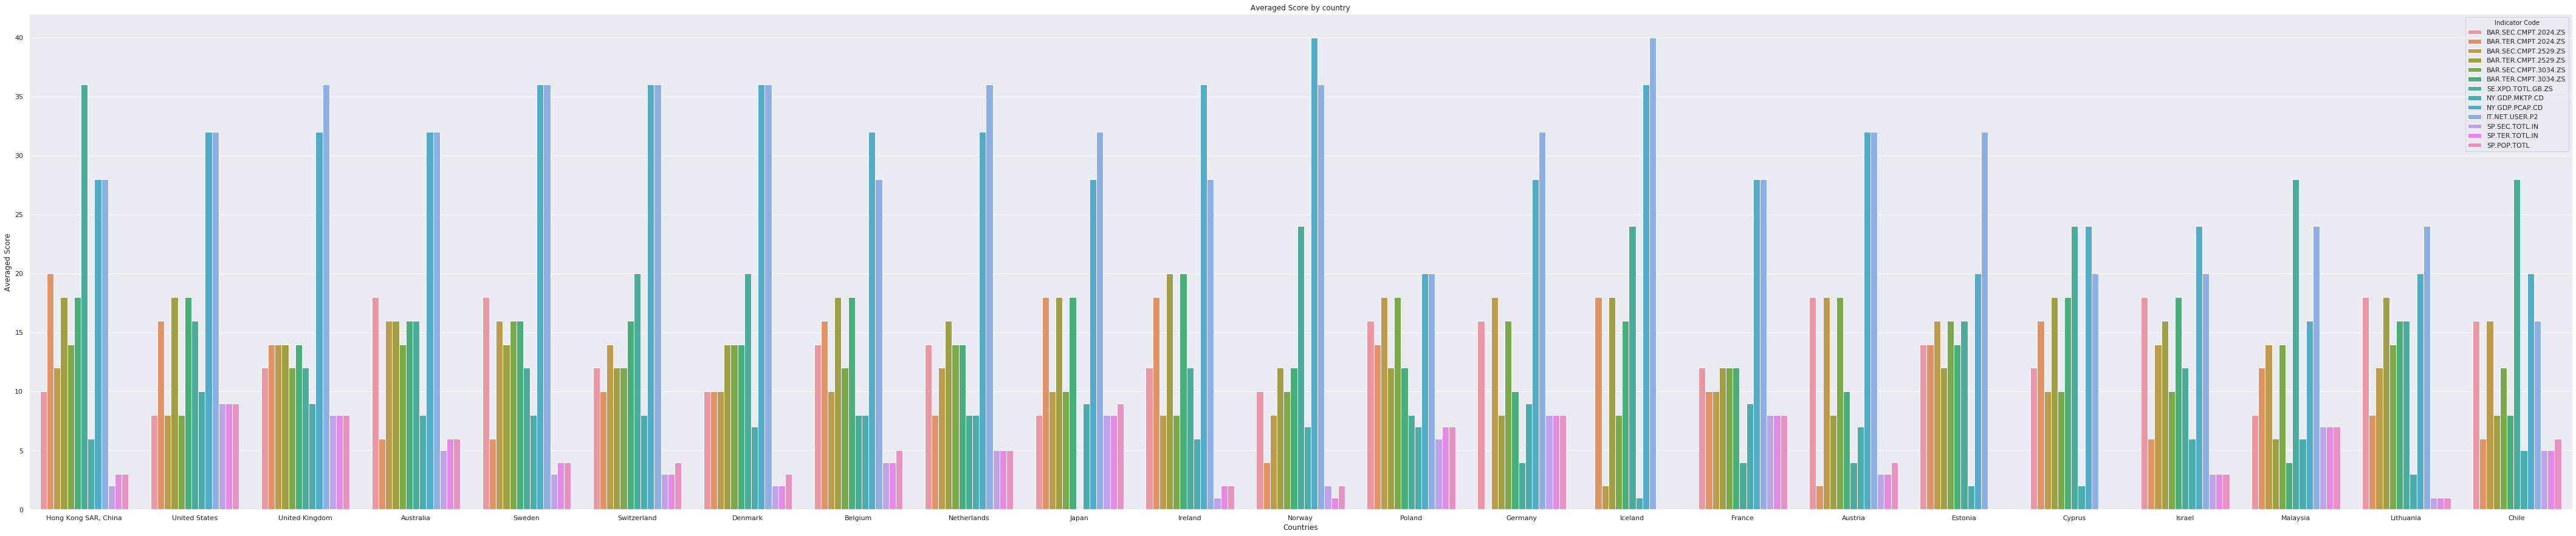

In [40]:
sns.set(color_codes=True) 

plt.figure(figsize=(75,15))

ax=sns.barplot(x='Country Name',y='AveragedScore3',order=list_of_selected_countries, hue="Indicator Code",data=NewSmartData, estimator=sum)
ax.set_title('Averaged Score by country')
ax.set_xlabel('Countries')
ax.set_ylabel('Averaged Score')
ax.figure.savefig("./Edstats_csv/averagedscorebyrestrictedcountrywithindicators3.png")

### Display a catplot with the averaged Score by country with the indicators (the 3rd time)

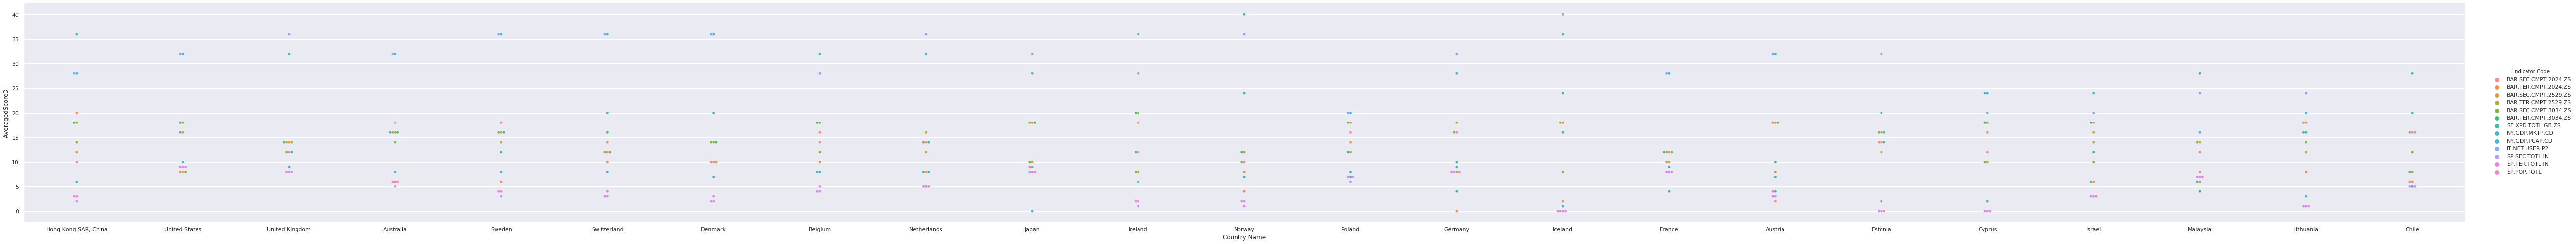

In [41]:
sns.set(color_codes=True)    
#sns.palplot(sns.color_palette())

#plt.figure(figsize=(100,200))

ax=sns.catplot(x='Country Name',y='AveragedScore3', hue="Indicator Code",order=list_of_selected_countries,data=NewSmartData,kind="swarm", estimator=sum, height=7, aspect=10)
plt.savefig('./Edstats_csv/averagedscorebyrestrictedcountrywithindicatorsswarm3.png')

There are better opportunities for countries where population is well educated, so we decide to increase the weight to 3 for the indicators related to tertiary education.

 ### Creation of a dictionnary that has for each indicator the associated weight

In [42]:
fourth_weights= [2, 3, 2, 3, 2, 3,4,1,4,4,1,1,1]
myzip=zip(indicators,fourth_weights)
fourth_weight_indicators=dict(myzip)
print(fourth_weight_indicators)

{'BAR.SEC.CMPT.2024.ZS': 2, 'BAR.TER.CMPT.2024.ZS': 3, 'BAR.SEC.CMPT.2529.ZS': 2, 'BAR.TER.CMPT.2529.ZS': 3, 'BAR.SEC.CMPT.3034.ZS': 2, 'BAR.TER.CMPT.3034.ZS': 3, 'SE.XPD.TOTL.GB.ZS': 4, 'NY.GDP.MKTP.CD': 1, 'NY.GDP.PCAP.CD': 4, 'IT.NET.USER.P2': 4, 'SP.SEC.TOTL.IN': 1, 'SP.TER.TOTL.IN': 1, 'SP.POP.TOTL': 1}


A new column of the dataset is affected to the new averaged score

In [43]:
NewSmartData['AveragedScore4']=NewSmartData['Indicator Code'].map(fourth_weight_indicators)*NewSmartData['Score']

### Compute the average score by country and select the ones that have a score higher than 178

In [44]:
ranking_df=NewSmartData[['Country Name','AveragedScore4']].groupby('Country Name').sum().sort_values(by=['AveragedScore4'], ascending=False)>=178

In [45]:
ranking_df=ranking_df.reset_index()
ranking_df

,Country Name,AveragedScore4
0,"Hong Kong SAR, China",True
1,United States,True
2,United Kingdom,True
3,Australia,True
4,Sweden,True
5,Switzerland,True
6,Japan,True
7,Belgium,True
8,Ireland,True
9,Denmark,True


The countries that have the value True in the AveragedScore column are stored in a list

In [46]:
restricted_list_of_countries=ranking_df['Country Name'].loc[ranking_df['AveragedScore4']==True]

In [47]:
list_of_selected_countries=restricted_list_of_countries.to_list()

The dataset is parsed and only the data related to the selected countries are kept

In [48]:
NewSmartData=NewSmartData.loc[NewSmartData['Country Name'].isin(list_of_selected_countries)]

### Display a barplot with the averaged Score by country (the 4th time)

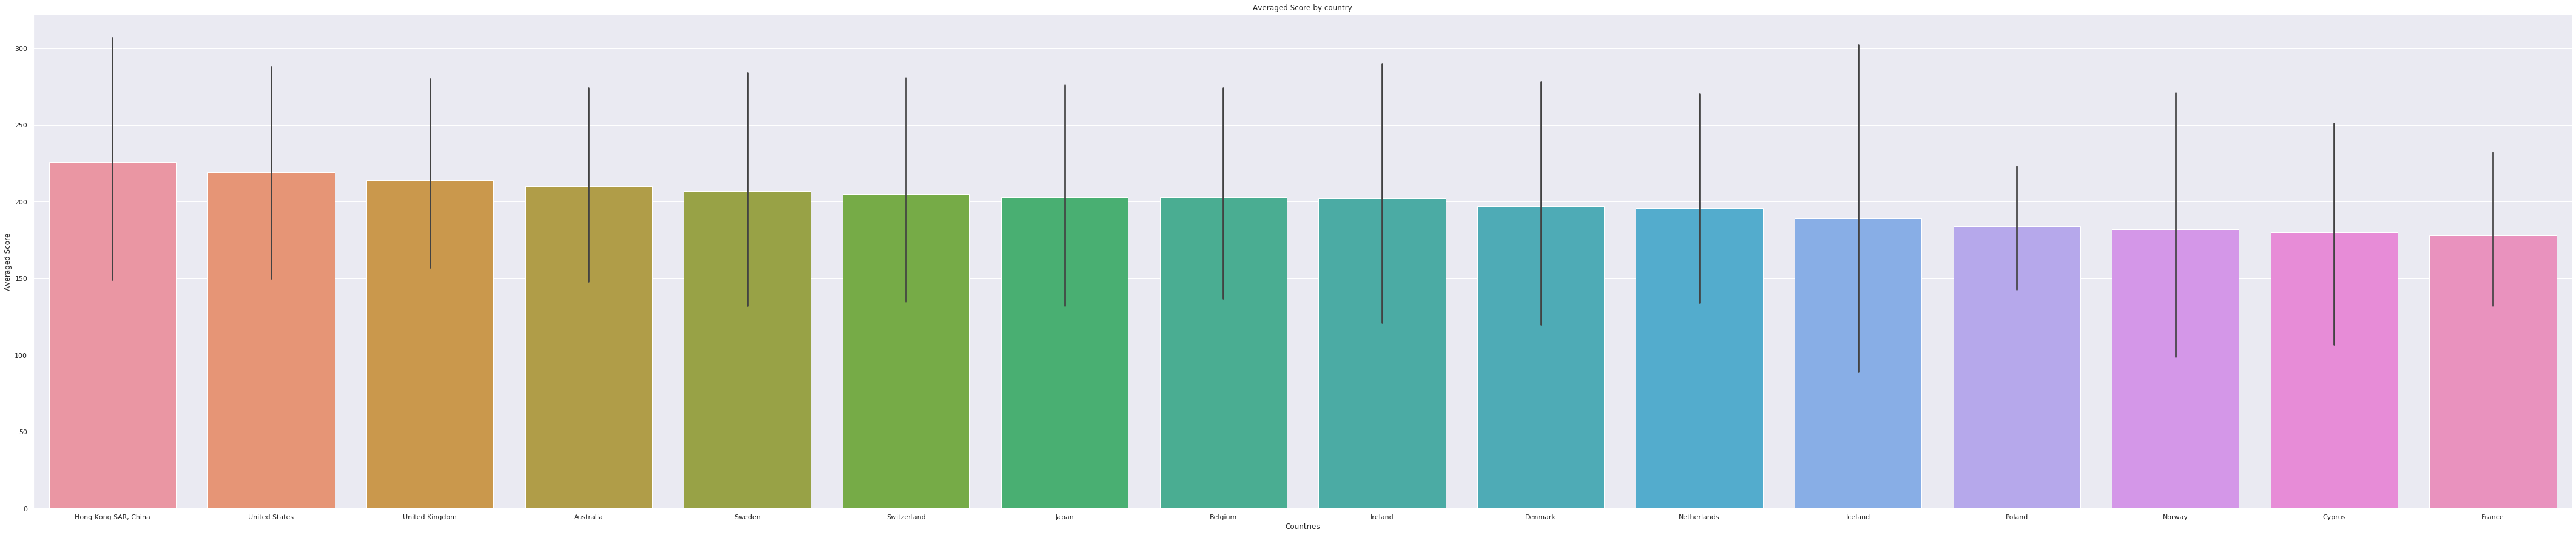

In [49]:
#sns.set(color_codes=True)    

plt.figure(figsize=(75,15))

ax=sns.barplot(x='Country Name',y='AveragedScore4', order=list_of_selected_countries, data=NewSmartData, estimator=sum)
#ax=sns.barplot(x='Country Name',y='AveragedScore', data=RankedData)
ax.set_title('Averaged Score by country')
ax.set_xlabel('Countries')
ax.set_ylabel('Averaged Score')
ax.figure.savefig("./Edstats_csv/averagedscorebycountry4.png")

### Display a barplot with the averaged Score by country with the indicators (the 4th time)

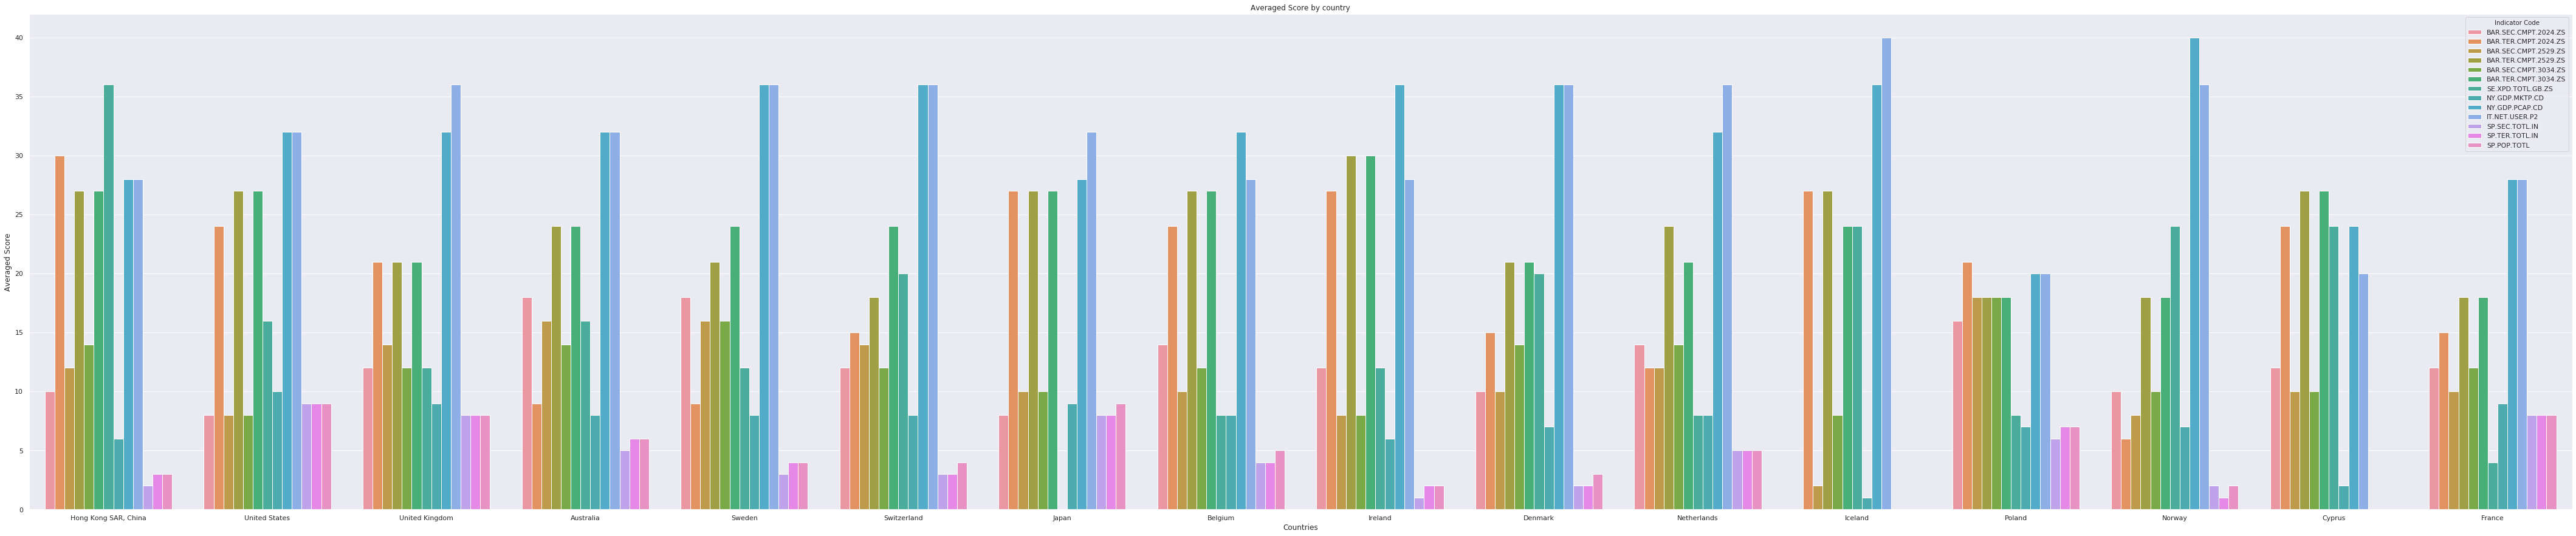

In [50]:
sns.set(color_codes=True) 

plt.figure(figsize=(75,15))

ax=sns.barplot(x='Country Name',y='AveragedScore4',order=list_of_selected_countries, hue="Indicator Code",data=NewSmartData, estimator=sum)
ax.set_title('Averaged Score by country')
ax.set_xlabel('Countries')
ax.set_ylabel('Averaged Score')
ax.figure.savefig("./Edstats_csv/averagedscorebyrestrictedcountrywithindicators4.png")

In [51]:
### Display a catplot with the averaged Score by country with the indicators (the 4th time)

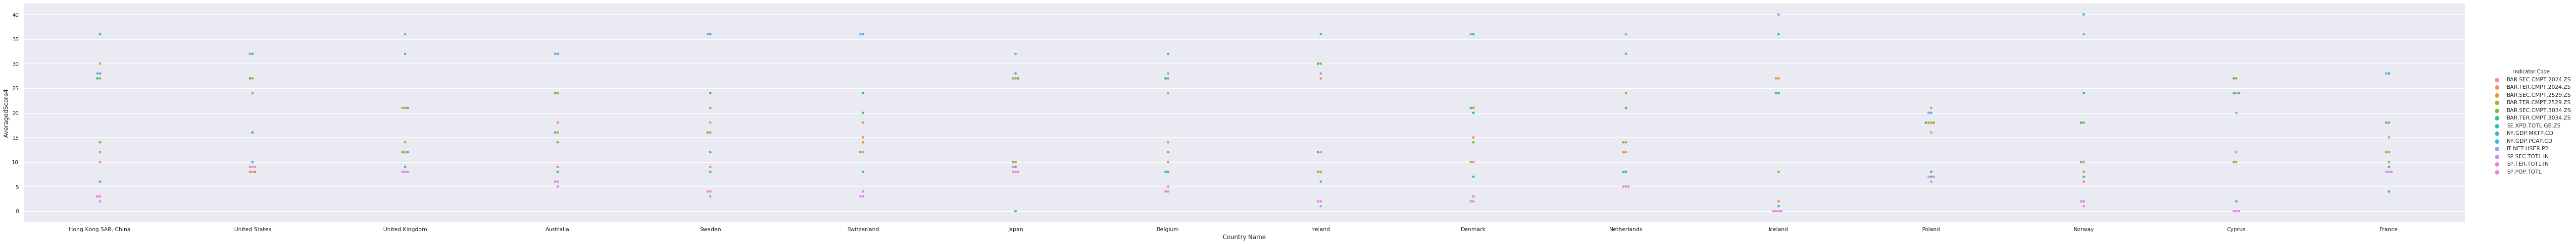

In [52]:
sns.set(color_codes=True)    
#sns.palplot(sns.color_palette())

#plt.figure(figsize=(100,200))

ax=sns.catplot(x='Country Name',y='AveragedScore4', hue="Indicator Code",order=list_of_selected_countries,data=NewSmartData,kind="swarm", estimator=sum, height=7, aspect=10)
plt.savefig('./Edstats_csv/averagedscorebyrestrictedcountrywithindicatorsswarm4.png')

### Compute the score for 2005

In [53]:
NewSmartData['AveragedScore2005']=NewSmartData['Indicator Code'].map(fourth_weight_indicators)*NewSmartData['Score2005']

In [54]:
NewSmartData

,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,...,2014,Average,Score,Score2005,Score2010,AveragedScore,AveragedScore2,AveragedScore3,AveragedScore4,AveragedScore2005
13,Australia,AUS,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.CMPT.2024.ZS,NaN,7.154000e+01,NaN,NaN,NaN,NaN,...,NaN,7.408500e+01,9.0,9.0,9.0,9.0,18.0,18.0,18.0,18.0
14,Australia,AUS,Barro-Lee: Percentage of population age 20-24 ...,BAR.TER.CMPT.2024.ZS,NaN,8.640000e+00,NaN,NaN,NaN,NaN,...,NaN,4.320000e+00,3.0,5.0,0.0,3.0,6.0,6.0,9.0,15.0
15,Australia,AUS,Barro-Lee: Percentage of population age 25-29 ...,BAR.SEC.CMPT.2529.ZS,NaN,5.521000e+01,NaN,NaN,NaN,NaN,...,NaN,4.783500e+01,8.0,8.0,6.0,8.0,16.0,16.0,16.0,16.0
16,Australia,AUS,Barro-Lee: Percentage of population age 25-29 ...,BAR.TER.CMPT.2529.ZS,NaN,2.458000e+01,NaN,NaN,NaN,NaN,...,NaN,2.635000e+01,8.0,8.0,8.0,8.0,16.0,16.0,24.0,24.0
17,Australia,AUS,Barro-Lee: Percentage of population age 30-34 ...,BAR.SEC.CMPT.3034.ZS,NaN,5.414000e+01,NaN,NaN,NaN,NaN,...,NaN,4.643000e+01,7.0,8.0,5.0,7.0,14.0,14.0,14.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,4.192181e+04,4.430792e+04,4.643707e+04,4.806154e+04,4.840143e+04,4.700156e+04,...,5.459855e+04,4.846651e+04,8.0,9.0,8.0,8.0,16.0,32.0,32.0,36.0
914,United States,USA,Internet users (per 100 people),IT.NET.USER.P2,6.475826e+01,6.796805e+01,6.893119e+01,7.500000e+01,7.400000e+01,7.100000e+01,...,7.300000e+01,7.110700e+01,8.0,8.0,7.0,8.0,16.0,32.0,32.0,32.0
915,United States,USA,Population of the official age for secondary e...,SP.SEC.TOTL.IN,2.532477e+07,2.553687e+07,2.573517e+07,2.574166e+07,2.572834e+07,2.570217e+07,...,2.483458e+07,2.548607e+07,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
916,United States,USA,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,2.074605e+07,2.104180e+07,2.131241e+07,2.138822e+07,2.146666e+07,2.156518e+07,...,2.273174e+07,2.167045e+07,9.0,9.0,0.0,9.0,9.0,9.0,9.0,9.0


### Compute the score for 2010

In [55]:
NewSmartData['AveragedScore2010']=NewSmartData['Indicator Code'].map(fourth_weight_indicators)*NewSmartData['Score2010']

In [60]:
NewSmartData

,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,...,Average,Score,Score2005,Score2010,AveragedScore,AveragedScore2,AveragedScore3,AveragedScore4,AveragedScore2005,AveragedScore2010
13,Australia,AUS,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.CMPT.2024.ZS,NaN,7.154000e+01,NaN,NaN,NaN,NaN,...,7.408500e+01,9.0,9.0,9.0,9.0,18.0,18.0,18.0,18.0,18.0
14,Australia,AUS,Barro-Lee: Percentage of population age 20-24 ...,BAR.TER.CMPT.2024.ZS,NaN,8.640000e+00,NaN,NaN,NaN,NaN,...,4.320000e+00,3.0,5.0,0.0,3.0,6.0,6.0,9.0,15.0,0.0
15,Australia,AUS,Barro-Lee: Percentage of population age 25-29 ...,BAR.SEC.CMPT.2529.ZS,NaN,5.521000e+01,NaN,NaN,NaN,NaN,...,4.783500e+01,8.0,8.0,6.0,8.0,16.0,16.0,16.0,16.0,12.0
16,Australia,AUS,Barro-Lee: Percentage of population age 25-29 ...,BAR.TER.CMPT.2529.ZS,NaN,2.458000e+01,NaN,NaN,NaN,NaN,...,2.635000e+01,8.0,8.0,8.0,8.0,16.0,16.0,24.0,24.0,24.0
17,Australia,AUS,Barro-Lee: Percentage of population age 30-34 ...,BAR.SEC.CMPT.3034.ZS,NaN,5.414000e+01,NaN,NaN,NaN,NaN,...,4.643000e+01,7.0,8.0,5.0,7.0,14.0,14.0,14.0,16.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,4.192181e+04,4.430792e+04,4.643707e+04,4.806154e+04,4.840143e+04,4.700156e+04,...,4.846651e+04,8.0,9.0,8.0,8.0,16.0,32.0,32.0,36.0,32.0
914,United States,USA,Internet users (per 100 people),IT.NET.USER.P2,6.475826e+01,6.796805e+01,6.893119e+01,7.500000e+01,7.400000e+01,7.100000e+01,...,7.110700e+01,8.0,8.0,7.0,8.0,16.0,32.0,32.0,32.0,28.0
915,United States,USA,Population of the official age for secondary e...,SP.SEC.TOTL.IN,2.532477e+07,2.553687e+07,2.573517e+07,2.574166e+07,2.572834e+07,2.570217e+07,...,2.548607e+07,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
916,United States,USA,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,2.074605e+07,2.104180e+07,2.131241e+07,2.138822e+07,2.146666e+07,2.156518e+07,...,2.167045e+07,9.0,9.0,0.0,9.0,9.0,9.0,9.0,9.0,0.0


###### Compute the score for the average

In [61]:
ranking_average_df=NewSmartData[['Country Name','AveragedScore4']].groupby('Country Name').sum()

In [73]:
ranking_average_df=ranking_average_df.reset_index()

###### Compute the score for 2005

In [74]:
ranking_average2005_df=NewSmartData[['Country Name','AveragedScore2005']].groupby('Country Name').sum()

In [75]:
ranking_average2005_df=ranking_average2005_df.reset_index()

###### Compute the score for 2010

In [63]:
ranking_average2010_df=NewSmartData[['Country Name','AveragedScore2010']].groupby('Country Name').sum()

In [76]:
ranking_average2010_df=ranking_average2010_df.reset_index()

In [77]:
ranking_average2010_df

,Country Name,AveragedScore2010
0,Australia,175.0
1,Belgium,186.0
2,Cyprus,159.0
3,Denmark,163.0
4,France,172.0
5,"Hong Kong SAR, China",187.0
6,Iceland,159.0
7,Ireland,175.0
8,Japan,198.0
9,Netherlands,189.0


###### Concat the dataframe into one

In [86]:
result_df=pd.concat([ranking_average2005_df,ranking_average2010_df,ranking_average_df],axis=1)

###### Remove the dupplicated columns

In [87]:
result_df=result_df.loc[:,~result_df.columns.duplicated()]

In [88]:
result_df

,Country Name,AveragedScore2005,AveragedScore2010,AveragedScore4
0,Australia,198.0,175.0,210.0
1,Belgium,187.0,186.0,203.0
2,Cyprus,165.0,159.0,180.0
3,Denmark,188.0,163.0,197.0
4,France,177.0,172.0,178.0
5,"Hong Kong SAR, China",189.0,187.0,226.0
6,Iceland,170.0,159.0,189.0
7,Ireland,181.0,175.0,202.0
8,Japan,207.0,198.0,203.0
9,Netherlands,190.0,189.0,196.0


### The dataframe is redesigned to be able to easily use the Seaborn module

In [89]:
graphresult_df=pd.melt(result_df,id_vars=['Country Name'], value_vars=['AveragedScore2005','AveragedScore2010','AveragedScore4'],var_name='Score')

In [91]:
graphresult_df

,Country Name,Score,value
0,Australia,AveragedScore2005,198.0
1,Belgium,AveragedScore2005,187.0
2,Cyprus,AveragedScore2005,165.0
3,Denmark,AveragedScore2005,188.0
4,France,AveragedScore2005,177.0
5,"Hong Kong SAR, China",AveragedScore2005,189.0
6,Iceland,AveragedScore2005,170.0
7,Ireland,AveragedScore2005,181.0
8,Japan,AveragedScore2005,207.0
9,Netherlands,AveragedScore2005,190.0


### Display a graph with different scores by country

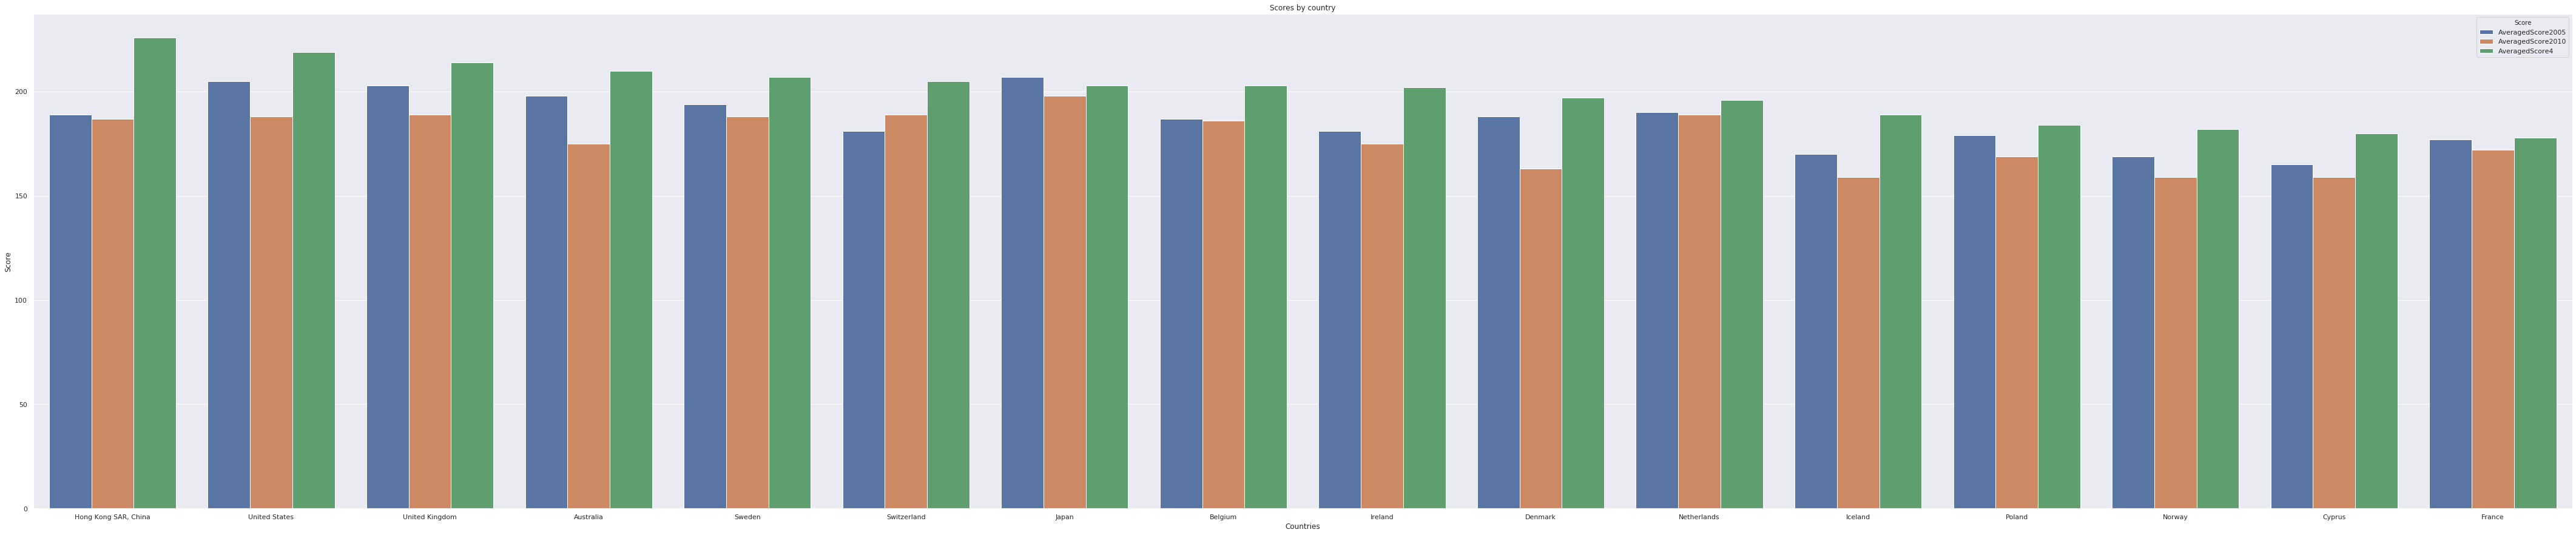

In [92]:
sns.set(color_codes=True) 

plt.figure(figsize=(75,15))

ax=sns.barplot(x='Country Name',y='value',order=list_of_selected_countries, hue="Score",data=graphresult_df)
ax.set_title('Scores by country')
ax.set_xlabel('Countries')
ax.set_ylabel('Score')
ax.figure.savefig("./Edstats_csv/scoresbycountry.png")